# Создание изображений по пространству

Создается плоскость, затем она случайно искривляется, сглаживается и пребразуется в изображение.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
width = int(1920 / 10)
height = int(1080 / 10)
data = np.zeros((height, width))

# randomize
for iy, ix in np.ndindex(data.shape):
    data[iy, ix] = int(np.random.rand() * 255)

In [3]:
def smooth(arr):
    for iy, ix in np.ndindex(arr.shape):
        left = arr[iy, ix - 1] if ix != 0 else arr[iy, ix]
        right = arr[iy, ix + 1] if ix != width - 1 else arr[iy, ix]
        top = arr[iy - 1, ix] if iy != 0 else arr[iy, ix]
        bottom = arr[iy + 1, ix] if iy != height - 1 else arr[iy, ix]
    
        arr[iy, ix] = ( \
            left + \
            right + \
            top + \
            bottom + \
            arr[iy, ix] \
        ) / 5
    return arr

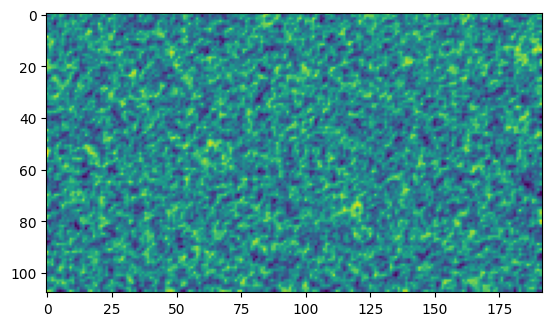

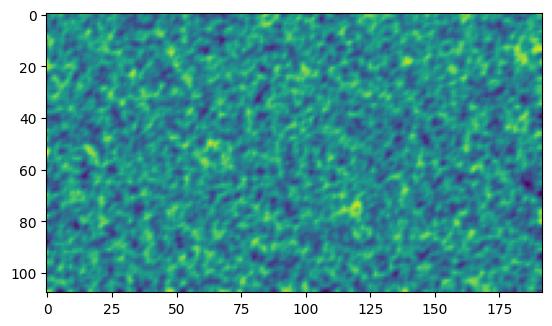

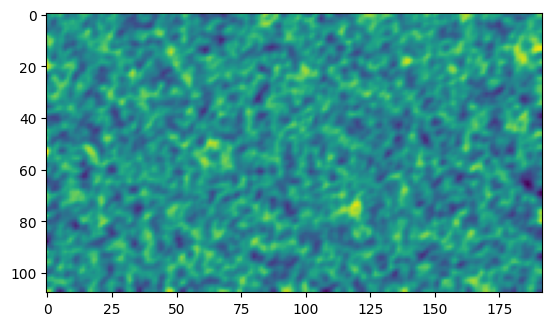

In [4]:
# smooth
for i in range(3):
    smooth(data)
    plt.imshow(data)
    plt.show()

In [5]:
pre = np.zeros((height, width, 3), dtype = np.uint8)

for iy, ix in np.ndindex(data.shape):
    value = data[iy, ix]
    
    colors = {
        0: (60, 0, 0),
        1: (100, 255, 0),
        2: (40, 0, 255),
        3: (0, 255, 0),
        4: (90, 255, 40),
        5: (255, 0, 255),
        6: (255, 255, 0),
    }
    
    pre[iy, ix] = colors[int(value / 40)]
    
img = Image.fromarray(pre)  
img.show()  